# Project Guideline
# GROUP 16



<br>


## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Memasukkan library yang akan kamu gunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Mengambil file .csv dari Google Drive kamu.

In [8]:
file_path = '/content/drive/MyDrive/juan data/Dataset.csv'
df = pd.read_csv(file_path)
df.head()


,NO,LB,LT,KT,KM,GRS,HARGA,Unnamed: 7,Unnamed: 8,Selisih,860,954,7,8,6,41570000000
0,1.0,220.0,220.0,3.0,3.0,0.0,3.800000e+09,NaN,NaN,Min,40,25,2,1,0,430000000
1,2.0,180.0,137.0,4.0,3.0,2.0,4.600000e+09,NaN,NaN,Max,900,979,9,9,6,42000000000
2,3.0,267.0,250.0,4.0,4.0,4.0,3.000000e+09,NaN,NaN,NO,LB,LT,KT,KM,GRS,HARGA
3,4.0,40.0,25.0,2.0,2.0,0.0,4.300000e+08,NaN,NaN,1,0.209302326,0.204402516,0.142857143,0.25,0,0.081068078
4,5.0,400.0,355.0,6.0,5.0,3.0,9.000000e+09,NaN,NaN,2,0.162790698,0.117400419,0.285714286,0.25,0.333333333,0.100312726


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

In [13]:
df_clean = df[['LB', 'LT', 'KT', 'KM', 'GRS', 'HARGA']].dropna()
df_clean = df_clean.astype(float)
df_clean.head()



,LB,LT,KT,KM,GRS,HARGA


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


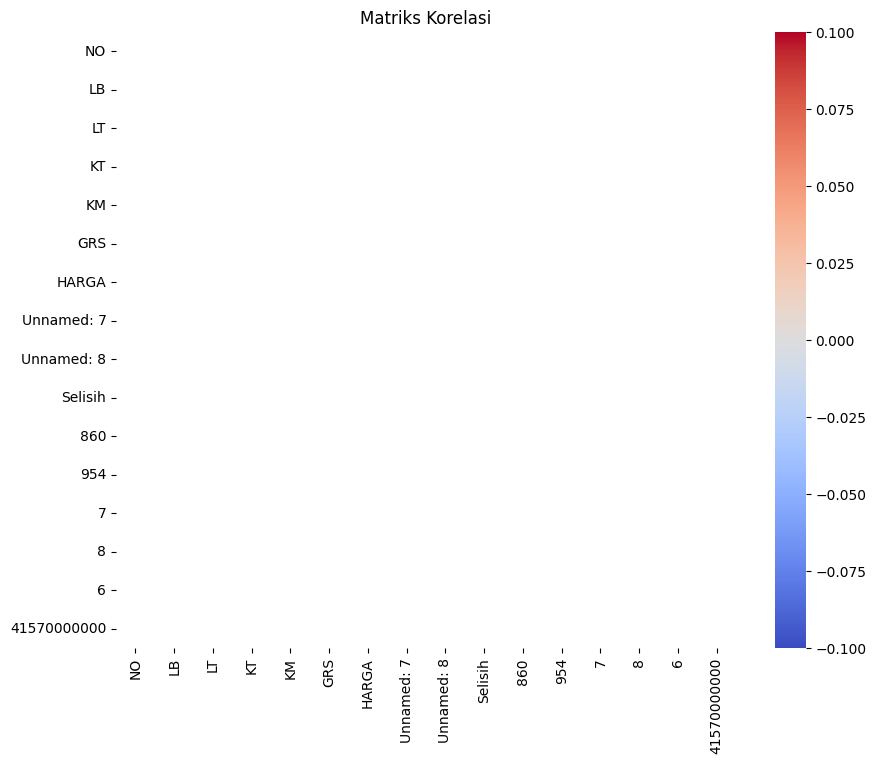

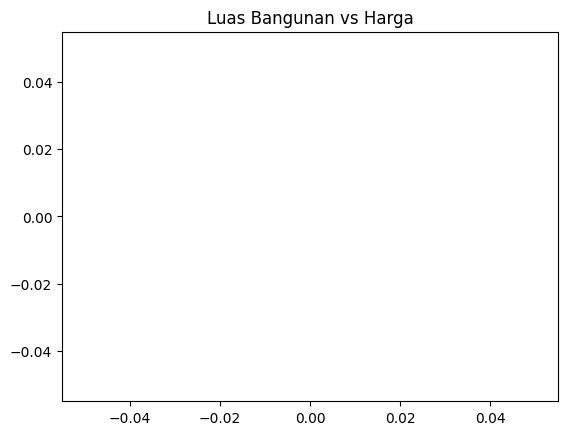

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

sns.scatterplot(x='LB', y='HARGA', data=df)
plt.title("Luas Bangunan vs Harga")
plt.show()


## Data Preparation

Memisahkan data training dan testing

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/drive/MyDrive/juan data/Dataset.csv')


df.columns = df.columns.str.strip()


kolom_utama = ['LB', 'LT', 'KT', 'KM', 'GRS', 'HARGA']
df = df[kolom_utama]


print("Jumlah missing values:\n", df.isnull().sum())


df = df.fillna(df.mean(numeric_only=True))


df = df.astype(float)


print("Jumlah baris setelah dibersihkan:", len(df))


X = df[['LB', 'LT', 'KT', 'KM', 'GRS']]
y = df['HARGA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)


Jumlah missing values:
 LB       3
LT       3
KT       3
KM       3
GRS      3
HARGA    3
dtype: int64
Jumlah baris setelah dibersihkan: 103
Train set: (82, 5)
Test set: (21, 5)


## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -853710404.837162
Coefficients: [ 2.09193379e+07  1.75220200e+07 -7.23461537e+07  8.93526398e+07
 -1.03404891e+09]


## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

Mean Squared Error: 2.915467940186264e+19
R-squared: 0.5809666894454228


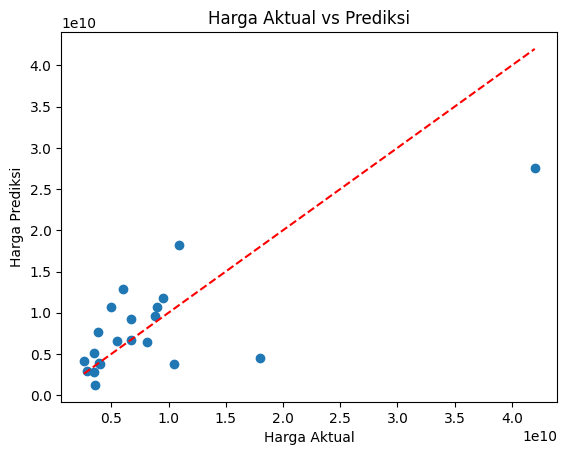

In [36]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Harga Aktual vs Prediksi")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
